# Extract the data from file 

In [2]:
# Extract data 

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import re

# Load the CSV file
file_path = "/Users/ailsamoody/Desktop/HPSEC/060125/HPLC_data_visual.csv"
df = pd.read_csv(file_path) 

In [6]:
# Filter out standard files (which don't follow fraction_number-sample_name format)
df_filtered = df[df['filename'].str.contains(r"^\d+-[A-Za-z0-9]+", regex=True)].copy()

print(df_filtered)

     Unnamed: 0  Area %                       filename  Elution Time  \
0             0  100.00        53-IEP2-31-33_S_280.CSV      9.368533   
1             1  100.00        52-IEP2-27-28_S_280.CSV     12.972700   
2             2  100.00           42-NF-R-21_S_280.CSV     15.612700   
3             3  100.00  35-BOOSTER-FD-22-23_S_280.CSV     10.856033   
4             4  100.00        25-PPC-QA-3-4_S_280.CSV     16.447700   
..          ...     ...                            ...           ...   
110         110  100.00  33-BOOSTER-FD-16-17_S_280.CSV     13.646033   
111         111  100.00     38-BOOSTER-FD-33_S_280.CSV     10.107083   
112         112    7.37        41-NF-R-17-18_S_214.CSV     13.405417   
113         113   92.63        41-NF-R-17-18_S_214.CSV     15.597083   
114         114  100.00           48-IEP2-16_S_214.CSV     15.953333   

          Integral  peak nr         kDa  Fraction  
0      6958.411718        1  276.069876       NaN  
1     31441.631470        1   2

In [8]:
df_filtered['filename'].unique()

array(['53-IEP2-31-33_S_280.CSV', '52-IEP2-27-28_S_280.CSV',
       '42-NF-R-21_S_280.CSV', '35-BOOSTER-FD-22-23_S_280.CSV',
       '25-PPC-QA-3-4_S_280.CSV', '44-NF-R-24_S_214.CSV',
       '50-IEP2-20-21_S_280.CSV', '31-PPC-QA-31-32_S_214.CSV',
       '30-PPC-QA-30_S_214.CSV', '36-BOOSTER-FD-30_S_214.CSV',
       '37-BOOSTER-FD-32_S_214.CSV', '45-NF-R-32_S_280.CSV',
       '51-IEP2-22-24_S_280.CSV', '32-PPC-QA-35-36_S_214.CSV',
       '43-NF-R-22-23_S_214.CSV', '40-NF-R-16_S_214.CSV',
       '34-BOOSTER-FD-19-20_S_214.CSV', '26-PPC-QA-15-16_S_214.CSV',
       '28-PPC-QA-21-22_S_280.CSV', '27-PPC-QA-18-19_S_280.CSV',
       '41-NF-R-17-18_S_280.CSV', '38-BOOSTER-FD-33_S_214.CSV',
       '33-BOOSTER-FD-16-17_S_214.CSV', '29-PPC-QA-23-24_S_214.CSV',
       '39-NF-R-15_S_280.CSV', '35-BOOSTER-FD-22-23_S_214.CSV',
       '25-PPC-QA-3-4_S_214.CSV', '42-NF-R-21_S_214.CSV',
       '52-IEP2-27-28_S_214.CSV', '53-IEP2-31-33_S_214.CSV',
       '49-IEP2-17-18_S_214.CSV', '30-PPC-QA-30_S_280.CSV',

# Clear name so there is no spaces 

In [11]:
df_filtered['processed names'] = (
    df_filtered['filename']
    .str.replace('NF-R', 'NFR')
    .str.replace('BOOSTER-FD', 'BOOSTERFD')
    .str.replace('PPC-QA', 'PPCQA')
)
df_filtered['processed names'].unique()

array(['53-IEP2-31-33_S_280.CSV', '52-IEP2-27-28_S_280.CSV',
       '42-NFR-21_S_280.CSV', '35-BOOSTERFD-22-23_S_280.CSV',
       '25-PPCQA-3-4_S_280.CSV', '44-NFR-24_S_214.CSV',
       '50-IEP2-20-21_S_280.CSV', '31-PPCQA-31-32_S_214.CSV',
       '30-PPCQA-30_S_214.CSV', '36-BOOSTERFD-30_S_214.CSV',
       '37-BOOSTERFD-32_S_214.CSV', '45-NFR-32_S_280.CSV',
       '51-IEP2-22-24_S_280.CSV', '32-PPCQA-35-36_S_214.CSV',
       '43-NFR-22-23_S_214.CSV', '40-NFR-16_S_214.CSV',
       '34-BOOSTERFD-19-20_S_214.CSV', '26-PPCQA-15-16_S_214.CSV',
       '28-PPCQA-21-22_S_280.CSV', '27-PPCQA-18-19_S_280.CSV',
       '41-NFR-17-18_S_280.CSV', '38-BOOSTERFD-33_S_214.CSV',
       '33-BOOSTERFD-16-17_S_214.CSV', '29-PPCQA-23-24_S_214.CSV',
       '39-NFR-15_S_280.CSV', '35-BOOSTERFD-22-23_S_214.CSV',
       '25-PPCQA-3-4_S_214.CSV', '42-NFR-21_S_214.CSV',
       '52-IEP2-27-28_S_214.CSV', '53-IEP2-31-33_S_214.CSV',
       '49-IEP2-17-18_S_214.CSV', '30-PPCQA-30_S_280.CSV',
       '36-BOOSTERFD-30_

# Extract the information from the fixed filenames

In [16]:
def extract_sample_fraction(s):
    # Find first and second hyphens
    first_hyphen = s.find('-')
    second_hyphen = s.find('-', first_hyphen + 1)
    
    # Extract the sample name
    sample_name = s[first_hyphen + 1 : second_hyphen]
    
    # Extract everything from the second hyphen up to '_S_'
    s_s_index = s.find('_S_')
    fraction_part = s[second_hyphen + 1 : s_s_index] if s_s_index != -1 else ""
    
    return sample_name, fraction_part

df_filtered['sample_name'], df_filtered['fraction_part'] = zip(*df_filtered['processed names'].map(extract_sample_fraction))

In [18]:
df_filtered.head()

,Unnamed: 0,Area %,filename,Elution Time,Integral,peak nr,kDa,Fraction,processed names,sample_name,fraction_part
0,0,100.0,53-IEP2-31-33_S_280.CSV,9.368533,6958.411718,1,276.069876,NaN,53-IEP2-31-33_S_280.CSV,IEP2,31-33
1,1,100.0,52-IEP2-27-28_S_280.CSV,12.972700,31441.631470,1,28.401014,NaN,52-IEP2-27-28_S_280.CSV,IEP2,27-28
2,2,100.0,42-NF-R-21_S_280.CSV,15.612700,27975.980930,1,5.368695,NaN,42-NFR-21_S_280.CSV,NFR,21
3,3,100.0,35-BOOSTER-FD-22-23_S_280.CSV,10.856033,13588.688550,1,107.990311,NaN,35-BOOSTERFD-22-23_S_280.CSV,BOOSTERFD,22-23
4,4,100.0,25-PPC-QA-3-4_S_280.CSV,16.447700,9822.871171,1,3.169899,NaN,25-PPCQA-3-4_S_280.CSV,PPCQA,3-4


# Extract the fraction numbers as fraction low and fraction high for samples with fraction range

In [21]:
def parse_fraction_part(x):
    if '-' in x:
        low, high = x.split('-')
        return low, high
    return x, x

df_filtered['fraction_low'], df_filtered['fraction_high'] = zip(*df_filtered['fraction_part'].map(parse_fraction_part))
df_filtered.head()

,Unnamed: 0,Area %,filename,Elution Time,Integral,peak nr,kDa,Fraction,processed names,sample_name,fraction_part,fraction_low,fraction_high
0,0,100.0,53-IEP2-31-33_S_280.CSV,9.368533,6958.411718,1,276.069876,NaN,53-IEP2-31-33_S_280.CSV,IEP2,31-33,31,33
1,1,100.0,52-IEP2-27-28_S_280.CSV,12.972700,31441.631470,1,28.401014,NaN,52-IEP2-27-28_S_280.CSV,IEP2,27-28,27,28
2,2,100.0,42-NF-R-21_S_280.CSV,15.612700,27975.980930,1,5.368695,NaN,42-NFR-21_S_280.CSV,NFR,21,21,21
3,3,100.0,35-BOOSTER-FD-22-23_S_280.CSV,10.856033,13588.688550,1,107.990311,NaN,35-BOOSTERFD-22-23_S_280.CSV,BOOSTERFD,22-23,22,23
4,4,100.0,25-PPC-QA-3-4_S_280.CSV,16.447700,9822.871171,1,3.169899,NaN,25-PPCQA-3-4_S_280.CSV,PPCQA,3-4,3,4


In [23]:
df_plot = df_filtered[['Area %', 'kDa', 'sample_name', 'fraction_low', 'fraction_high']].copy()
df_plot['fraction_low'] = pd.to_numeric(df_plot['fraction_low'], errors='coerce')
df_plot.head()

,Area %,kDa,sample_name,fraction_low,fraction_high
0,100.0,276.069876,IEP2,31,33
1,100.0,28.401014,IEP2,27,28
2,100.0,5.368695,NFR,21,21
3,100.0,107.990311,BOOSTERFD,22,23
4,100.0,3.169899,PPCQA,3,4


# Save cleaned data as csv

In [28]:
# Save the cleaned data
df_plot.to_csv("cleaned_HPLC_data.csv", index=False)

# Create interactive plot 3D

In [60]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.subplots as psub
import re

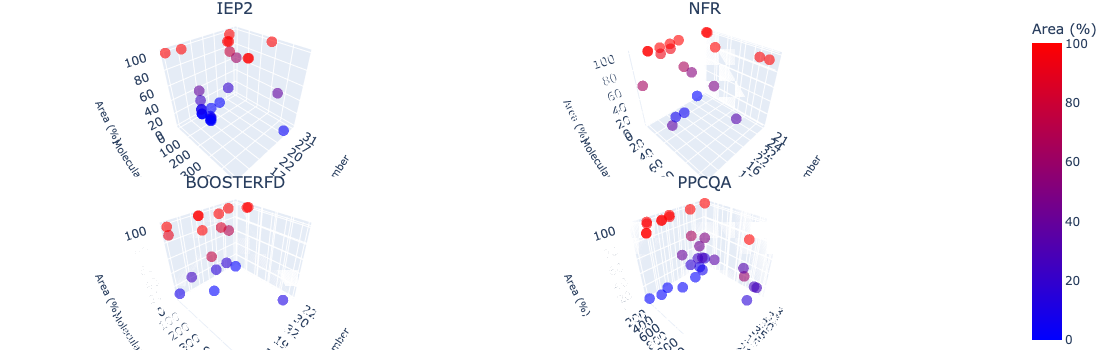

In [150]:
# Generate a 2x2 grid of 3D plots
sample_names = df_plot['sample_name'].unique()
fig = psub.make_subplots(rows=2, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}], [{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
                         subplot_titles=sample_names, horizontal_spacing=0.02, vertical_spacing=0.02)


# Manually adjust annotation y-positions to move titles lower
for annotation in fig['layout']['annotations']:
    annotation['y'] -= 0.03

positions = [(1, 1), (1, 2), (2, 1), (2, 2)]
scenes = {}
traces = []

for i, (sample, (row, col)) in enumerate(zip(sample_names, positions)):
    df_sample = df_filtered[df_filtered['sample_name'] == sample]
    scatter3d = go.Scatter3d(
        x=df_sample['fraction_low'],
        y=df_sample['kDa'],
        z=df_sample['Area %'],
        mode='markers',
        marker=dict(
            size=6,
            color=df_sample['Area %'],  # Color by Area %
            colorscale=[(0, 'blue'), (1, 'red')],
            opacity=0.6,
            showscale=False  # Disable multiple colorbars
        ),
        name=sample,
        text=df_sample['sample_name'],
        showlegend=False  # Remove legend entries
    )
    fig.add_trace(scatter3d, row=row, col=col)
    scenes[f'scene{i+1}'] = dict(
        xaxis=dict(title='Fraction Number', titlefont=dict(size=10)),
        yaxis=dict(title='Molecular Weight (kDa)', titlefont=dict(size=10)),
        zaxis=dict(title='Area (%)', titlefont=dict(size=10))
    )

# Add a single color bar with correct scale
fig.add_trace(go.Scatter3d(
    x=[None], y=[None], z=[None],
    mode='markers',
    marker=dict(
        size=8,
        color=[df_filtered['Area %'].min(), df_filtered['Area %'].max()],
        colorscale=[(0, 'blue'), (1, 'red')],
        cmin=df_filtered['Area %'].min(),
        cmax=df_filtered['Area %'].max(),
        showscale=True,
        colorbar=dict(title='Area (%)', x=1.1)
    ),
    showlegend=False  # Ensure this does not appear in the legend
))

# Layout configuration
fig.update_layout(
    title='',
    margin=dict(l=10, r=10, t=10, b=10),
    showlegend=False,
    **scenes
)




In [154]:
# Save as interactive HTML file
html_file = "interactive_chromatography.html"
pio.write_html(fig, html_file)

print(f"Filtered data saved as cleaned_HPLC_data.csv")
print(f"Interactive visualization saved as {html_file}. Open it in a browser to explore!")

Filtered data saved as cleaned_HPLC_data.csv
Interactive visualization saved as interactive_chromatography.html. Open it in a browser to explore!
